# Assignment 2

# 1. 复习上课内容以及复现课程代码

In [142]:
from sklearn.datasets import load_boston
import random

In [143]:
dataset = load_boston()

In [144]:
dataset.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [145]:
x,y=dataset['data'],dataset['target']

In [146]:
x.shape

(506, 13)

In [147]:
dataset.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [148]:
dataset['DESCR']

".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per $10,000

In [149]:
X_rm = x[:,5]

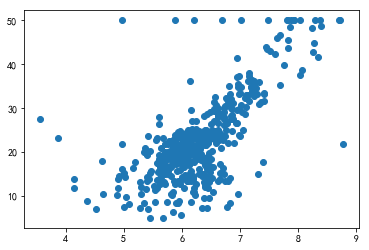

In [150]:
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(X_rm,y)

# Gradient descent

# assume that the target function is a linear function
$$ y = k*rm + b$$

In [151]:
def price(rm, k, b):
    return k * rm + b

# define mean square loss

$$ loss = \frac{1}{n}\sum{(y_i - \hat{y_i})}^2$$

$$ loss = \frac{1}{n}\sum{(y_i - (kx_i + b_i)}^2$$

In [152]:
# define loss functon
def loss(y,y_hat):
    return sum((y_i - y_hat_i)**2 for y_i, y_hat_i in zip(list(y),list(y_hat))) / len(list(y))

# define partial derivatives

$$\frac{\partial{loss}}{\partial{k}} = - \frac{2}{n}\sum(y_i - \hat{y_i})x_i$$

$$\frac{\partial{loss}}{\partial{k}} = - \frac{2}{n}\sum(y_i - \hat{y_i})$$

In [153]:
# define partial derivative
def partial_derivative_k(x,y,y_hat):
    n = len(y)
    gradient = 0
    for x_i,y_i,y_hat_i in zip(list(x),list(y),list(y_hat)):
        gradient += (y_i - y_hat_i)*x_i
        return -gradient*2/n
def partial_derivative_b(y,y_hat):
    n = len(y)
    gradient = 0
    for y_i,y_hat_i in zip(list(y),list(y_hat)):
        gradient += (y_i - y_hat_i)
        return -gradient*2/n   

In [154]:
k = random.random() *200 -200
b = random.random()*200 - 200

learning_rate = 10

iternation_num = 200
losess = []
for i in range(iternation_num):
    price_use_current_parameters = [price(r, k, b) for r in X_rm]
    
    current_loss = loss(y, price_use_current_parameters)
    losess.append(current_loss)
    print("Iteration {}, the loss is {}, parameters k is {} and b is {}".format(i,current_loss,k,b))
    
    k_gradient = partial_derivative_k(X_rm, y, price_use_current_parameters)
    b_gradient = partial_derivative_b(y, price_use_current_parameters)
    
    k = k + (-1 * k_gradient) * learning_rate
    b = b + (-1 * b_gradient) * learning_rate
best_k = k
best_b = b

Iteration 0, the loss is 237064.4937731296, parameters k is -48.31630994413919 and b is -158.99366258778701
Iteration 1, the loss is 126792.57705503418, parameters k is 81.79940579078382 and b is -139.2042001185972
Iteration 2, the loss is 75599.12724629106, parameters k is -15.559164216505792 and b is -154.01158719194925
Iteration 3, the loss is 39047.29175214958, parameters k is 57.28900097496643 and b is -142.9320183415352
Iteration 4, the loss is 24486.63495674367, parameters k is 2.78064930785915 and b is -151.22226194109527
Iteration 5, the loss is 11917.110195528605, parameters k is 43.56630799474188 and b is -145.01911993548572
Iteration 6, the loss is 8185.099360976601, parameters k is 13.048600090418976 and b is -149.6605964228352
Iteration 7, the loss is 3622.4608181407066, parameters k is 35.88335440647718 and b is -146.18762998693282
Iteration 8, the loss is 2918.5209384366076, parameters k is 18.797339745432538 and b is -148.78626339545673
Iteration 9, the loss is 1139.73

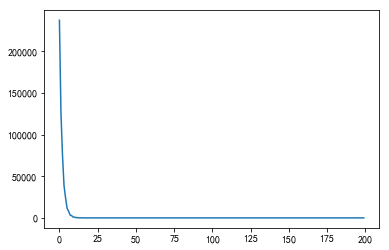

In [155]:
plt.plot(list(range(iternation_num)),losess)

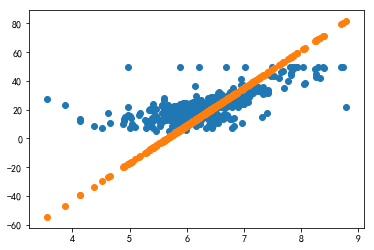

In [156]:
price_use_best_parameters = [price(r, best_k, best_b) for r in X_rm]

plt.scatter(X_rm,y)
plt.scatter(X_rm,price_use_current_parameters)

# BFS

In [157]:
coordination_source = """
{name:'兰州', geoCoord:[103.73, 36.03]},
{name:'嘉峪关', geoCoord:[98.17, 39.47]},
{name:'西宁', geoCoord:[101.74, 36.56]},
{name:'成都', geoCoord:[104.06, 30.67]},
{name:'石家庄', geoCoord:[114.48, 38.03]},
{name:'拉萨', geoCoord:[102.73, 25.04]},
{name:'贵阳', geoCoord:[106.71, 26.57]},
{name:'武汉', geoCoord:[114.31, 30.52]},
{name:'郑州', geoCoord:[113.65, 34.76]},
{name:'济南', geoCoord:[117, 36.65]},
{name:'南京', geoCoord:[118.78, 32.04]},
{name:'合肥', geoCoord:[117.27, 31.86]},
{name:'杭州', geoCoord:[120.19, 30.26]},
{name:'南昌', geoCoord:[115.89, 28.68]},
{name:'福州', geoCoord:[119.3, 26.08]},
{name:'广州', geoCoord:[113.23, 23.16]},
{name:'长沙', geoCoord:[113, 28.21]},
//{name:'海口', geoCoord:[110.35, 20.02]},
{name:'沈阳', geoCoord:[123.38, 41.8]},
{name:'长春', geoCoord:[125.35, 43.88]},
{name:'哈尔滨', geoCoord:[126.63, 45.75]},
{name:'太原', geoCoord:[112.53, 37.87]},
{name:'西安', geoCoord:[108.95, 34.27]},
//{name:'台湾', geoCoord:[121.30, 25.03]},
{name:'北京', geoCoord:[116.46, 39.92]},
{name:'上海', geoCoord:[121.48, 31.22]},
{name:'重庆', geoCoord:[106.54, 29.59]},
{name:'天津', geoCoord:[117.2, 39.13]},
{name:'呼和浩特', geoCoord:[111.65, 40.82]},
{name:'南宁', geoCoord:[108.33, 22.84]},
//{name:'西藏', geoCoord:[91.11, 29.97]},
{name:'银川', geoCoord:[106.27, 38.47]},
{name:'乌鲁木齐', geoCoord:[87.68, 43.77]},
{name:'香港', geoCoord:[114.17, 22.28]},
{name:'澳门', geoCoord:[113.54, 22.19]}
"""

In [158]:
import re

In [159]:
def get_city_info(city_coordination):
    city_location = {}
    for line in city_coordination.split('\n'):
        if line.startswith('//'):
            continue
        if line.strip() == "":
            continue
        pattern = re.compile(r"{name:'(\w+)',\s+geoCoord:\[(\d+.\d+),\s+(\d+.\d+)\]")
        city,longtitude,latitude = re.findall(pattern, line)[0]
        city_location[city] = (float(longtitude),float(latitude))
    return city_location
city_location = get_city_info(coordination_source)
city_location

{'兰州': (103.73, 36.03),
 '嘉峪关': (98.17, 39.47),
 '西宁': (101.74, 36.56),
 '成都': (104.06, 30.67),
 '石家庄': (114.48, 38.03),
 '拉萨': (102.73, 25.04),
 '贵阳': (106.71, 26.57),
 '武汉': (114.31, 30.52),
 '郑州': (113.65, 34.76),
 '济南': (117.0, 36.65),
 '南京': (118.78, 32.04),
 '合肥': (117.27, 31.86),
 '杭州': (120.19, 30.26),
 '南昌': (115.89, 28.68),
 '福州': (119.3, 26.08),
 '广州': (113.23, 23.16),
 '长沙': (113.0, 28.21),
 '沈阳': (123.38, 41.8),
 '长春': (125.35, 43.88),
 '哈尔滨': (126.63, 45.75),
 '太原': (112.53, 37.87),
 '西安': (108.95, 34.27),
 '北京': (116.46, 39.92),
 '上海': (121.48, 31.22),
 '重庆': (106.54, 29.59),
 '天津': (117.2, 39.13),
 '呼和浩特': (111.65, 40.82),
 '南宁': (108.33, 22.84),
 '银川': (106.27, 38.47),
 '乌鲁木齐': (87.68, 43.77),
 '香港': (114.17, 22.28),
 '澳门': (113.54, 22.19)}

In [160]:
strs = "{name:'香港', geoCoord:[114.17, 22.28]}"
pattern = re.compile(r"{name:'(\w+)',\s+geoCoord:\[(\d+.\d+),\s+(\d+.\d+)\]")
# pattern1 = re.compile(r"geoCoord:\[(\d+.\d+),\s+(\d+.\d+)\]")
city,longtitude,latitude= re.findall(pattern,strs)[0]
# longtitude,latitude= re.findall(pattern1,strs)[0]
print(city,longtitude,latitude)

香港 114.17 22.28


# compute distance between cities

In [161]:
import math
def geo_distance(origen, destination):
    """origen:(lat, long)
    destination:(lat, long)
    """
    
    lat1, lon1 = origen
    lat2, lon2 = destination
    radius = 6371  # km

    dlat = math.radians(lat2 - lat1)
    dlon = math.radians(lon2 - lon1)
    a = (math.sin(dlat / 2) * math.sin(dlat / 2) +
         math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) *
         math.sin(dlon / 2) * math.sin(dlon / 2))
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    d = radius * c

    return d
def get_city_distance(city1,city2):
    return geo_distance(city_location[city1],city_location[city2])

get_city_distance("杭州","上海")

153.5185697155768

# draw the graph

In [162]:
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

In [163]:
city_location.keys()

dict_keys(['兰州', '嘉峪关', '西宁', '成都', '石家庄', '拉萨', '贵阳', '武汉', '郑州', '济南', '南京', '合肥', '杭州', '南昌', '福州', '广州', '长沙', '沈阳', '长春', '哈尔滨', '太原', '西安', '北京', '上海', '重庆', '天津', '呼和浩特', '南宁', '银川', '乌鲁木齐', '香港', '澳门'])

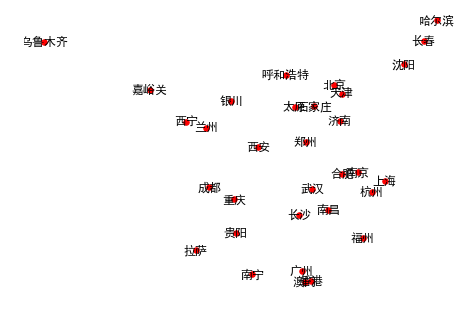

In [164]:
city_graph = nx.Graph()
city_graph.add_nodes_from(list(city_location.keys()))
nx.draw(city_graph, city_location, with_labels=True, node_size=30)

# build connection between let's assume that two cities are connection if their distance is less than 700 km.

In [165]:
threhold = 700
from collections import defaultdict
def build_connection(city_info):
    ''''''
    cities_connection = defaultdict(list)
    cities = list(city_info.keys())
    for c1 in cities:
        for c2 in cities:
            if c1 == c2:
                continue
            if get_city_distance(c1,c2) < threhold:
                cities_connection[c1].append(c2)
    return cities_connection
cities_connecton = build_connection(city_location)

In [166]:
cities_connecton

defaultdict(list,
            {'兰州': ['嘉峪关', '西宁', '成都', '拉萨', '贵阳', '西安', '重庆', '南宁', '银川'],
             '嘉峪关': ['兰州', '西宁', '成都', '拉萨'],
             '西宁': ['兰州', '嘉峪关', '成都', '拉萨', '贵阳', '重庆', '银川'],
             '成都': ['兰州', '嘉峪关', '西宁', '拉萨', '贵阳', '西安', '重庆', '南宁', '银川'],
             '石家庄': ['武汉',
              '郑州',
              '济南',
              '南京',
              '合肥',
              '南昌',
              '广州',
              '长沙',
              '太原',
              '西安',
              '北京',
              '天津',
              '呼和浩特'],
             '拉萨': ['兰州', '嘉峪关', '西宁', '成都', '贵阳', '重庆', '南宁', '银川'],
             '贵阳': ['兰州', '西宁', '成都', '拉萨', '西安', '重庆', '南宁', '银川'],
             '武汉': ['石家庄',
              '郑州',
              '济南',
              '南京',
              '合肥',
              '杭州',
              '南昌',
              '福州',
              '广州',
              '长沙',
              '太原',
              '西安',
              '北京',
              '天津',
              '呼和浩特',
  

# draw connecton graph

D:\ProgramData\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


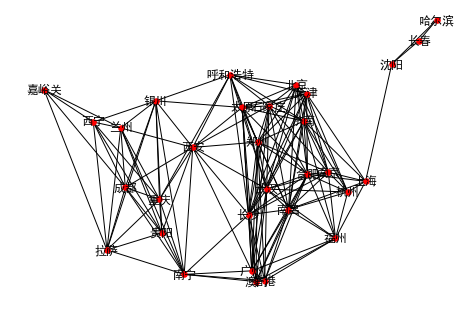

In [167]:
cities_connection_graph = nx.Graph(cities_connecton)
nx.draw(cities_connection_graph, city_location, with_labels=True, node_size=30)

In [168]:
%%time
def search_1(graph,start,distination):
    paths = [[start]]
    
    visitied = set()
    while paths:
        path = paths.pop(0)
#         print(path)
        froniter = path[-1]
        if froniter in visitied:
            continue
#         print("graph[froniter]:",graph[froniter])
        for city in graph[froniter]:
            if city in path:
                continue
            new_path = path +[city]
            paths.append(new_path)
#             print(paths)
            
            if city == distination:
                return new_path
        visitied.add(froniter)
        
print(search_1(cities_connecton,"上海","香港")  )    

['上海', '合肥', '香港']
Wall time: 0 ns


In [169]:
print('南昌' in  cities_connecton['上海'])
print('合肥' in  cities_connecton['上海'])
print('香港' in cities_connecton['合肥'])
print('香港' in cities_connecton['南昌'])

True
True
True
True


In [170]:
%%time
def search_bfs(graph, start, distination):
    '''BFS的实现方式2'''
    paths = [[start]]
    visitied = set()
    while paths:
        path = paths.pop(0)
        froniter = path[-1]
#         print(froniter,'\n','\n',paths)
        for city in list(set(graph.get(froniter)) - visitied):
            if city == distination:
                return path+[city]
            new_path = path+[city]
            paths.append(new_path)
        visitied.add(froniter)
print(search_bfs(cities_connecton,"上海","香港"))             

['上海', '南昌', '香港']
Wall time: 0 ns


# search_bfs 的时间复杂度 比 search_1 优越明显！！
<可是如何搜索到并返回所有的路线呢？>

# option search using variation of bfs

In [171]:
def get_distance_of_path(path):
    distance = 0
    for i in range(len(path) - 1):
        distance += get_city_distance(path[i], path[i+1])
        
    return distance

def sort_by_distance(paths):
    '''根据每一条路径的长度来返回'''
    return sorted(paths,key=get_distance_of_path,reverse=False)

def sort_by_stations(paths):
    '''根据每一条路经过的城市数的长度来返回'''
    return sorted(paths,key=len, reverse=False)

def search_2(graph,start,distination,search_strategy=None):
    '''先求出所有可能得路径，再根据搜索策略返回响应的最优路径'''
    paths = [[start]]
    # 存储搜索到的包含目的地的路径
    paths_find = []
    # 记录当前已经找到的路径数
    i=0
    
#     visitied = set()
    while paths:
        if i >= 10:
#             print(f"have find {i} paths.")
            break
        path = paths.pop(0)
#         print(f"start search path:{path}")
        froniter = path[-1]
        # 初始化新路径的时候清空
        visitied = set(path)
        
        for city in list(set(graph[froniter]) - visitied):
            if city in path:
                continue
            new_path = path +[city]
            if city == distination:
                paths_find.append(new_path)
#                 print(f"find NO:{i},path:{new_path}")
                i += 1
                # 当前节点是目的地是返回，即当前节点的子节点不在搜索了
                break 
            paths.append(new_path)
        visitied.add(froniter)
        
    if  search_strategy:
        paths_find = search_strategy(paths_find)
        
    if paths_find and (distination == paths_find[0][-1]):
        return (paths_find[0], get_distance_of_path(paths_find[0]))
        
search_2(cities_connecton,"上海","香港")      

(['上海', '南昌', '香港'], 992.5149284982448)

In [172]:
%%time
def dfs_path(graph, start, goal):
    """
    我们找到目标时产生每个可能的路径。
    使用生成器将允许用户计算期望数量的替代路径
    :param graph:搜索图
    :param start:开始节点
    :param goal:目标节点
    :return:
    """

    stack = [(start, [start])]
    while stack:
        (vertex, path) = stack.pop()
        for it in set(graph[vertex]) - set(path):
            if it == goal:
                yield path + [it]
            else:
                stack.append((it, path+[it]))
result = dfs_path(cities_connecton,"北京","香港")
print(type(result),result)

<class 'generator'> <generator object dfs_path at 0x0000015A4E1E9570>
Wall time: 0 ns


In [173]:
%%time 
print(search_2(cities_connecton,"北京","香港",search_strategy=sort_by_distance))

(['北京', '武汉', '香港'], 883.4071947934851)
Wall time: 997 µs


In [174]:
search_2(cities_connecton,"北京","香港",search_strategy=sort_by_stations)

(['北京', '长沙', '香港'], 959.2291546646142)

In [175]:
print('🚈'.join(search_2(cities_connecton,"北京","香港",search_strategy=sort_by_stations)[0]),"with distances:",search_2(cities_connecton,"北京","香港",search_strategy=sort_by_stations)[1])

北京🚈长沙🚈香港 with distances: 959.2291546646142


# 2. 回答以下理论题目

2.1 What conditions are required to make the BFS return the optimal solution ?
Ans:要有cost并且cost 不能为负数
2.2 Is there a way to make DFS find the optimal solution ? (You may need to read some material about iterative DFS)
Ans:No
2.3 In what conditions BFS is a better choice than DFS and vice versa ?
Ans:要有cost并且cost 不能为负数
2.4 When can we use machine learning ?
Ans:有足够多的数据，规则过于复杂难于维护
2.5 What is the gradient of a function ?
Ans:函数在某个点的梯度就是函数在该点关于自变量的变化率
2.6 How can we find the maximum value of a function using the information of gradient ?
Ans:求导数，令导数等于0的点，(好像系数要为正，为负时求的是最小值)

# 3. 实践部分 寻找地铁路线

# 3.1. Get data from web.

In [176]:
import requests
from bs4 import BeautifulSoup as bs 
import re
import json

In [177]:
class Subway(object):
    def __init__(self):
        self.url = "http://map.amap.com/subway/index.html?&1100"
        self.header = {
            'user-agent':'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/63.0.3239.132 Safari/537.36'
        }
    def get_data(self):
        responese = requests.get(self.url,headers=self.header)
        return responese.text
    def parse_get_subway(self,ID,city,name):
        """# 解析每个城市地铁信息(地铁数量，站点)"""
        # 拼接地铁信息的url
        url = 'http://map.amap.com/service/subway?_1555502190153&srhdata=' + ID + '_drw_' + city + '.json'
        
        responese = requests.get(url,self.header)
        html = responese.text
        result = json.loads(html)
        for node in result['l']:
            for start in node['st']:
                # 判断是否含有地铁分线
                # node:"l"里包含所有地铁路线  “la”为分线
                if len(node['la']) > 0 :
                    # "ln"为1号线，2号线。。。  “n”为地铁站站名
                    print(name, node['ln'] + '(' + node['la'] + ')', start['n'], start['sl'].split(',')[0], start['sl'].split(',')[1])
                    
                    with open("subway.txt","a+",encoding='utf8') as f:
                        f.write(name + ',' + node['ln'] + '(' + node['la'] + ')' + ',' + start['n'] +','+ start['sl'].split(',')[0]+','+start['sl'].split(',')[1]+ '\n')
                else:
                    print(name, node['ln'],start['n'], start['sl'].split(',')[0], start['sl'].split(',')[1])
                    with open("subway.txt","a+",encoding='utf8') as f:
                        f.write(name + ',' + node['ln'] + ',' + start['n'] +','+ start['sl'].split(',')[0]+','+start['sl'].split(',')[1]+ '\n')
     # 解析数据
    def parse_city_data(self, data):
        data = data.encode('ISO-8859-1')
        data = data.decode('utf-8')
        soup = bs(data, 'lxml')
        
        # 获取城市信息
        res1 = soup.find_all(class_="city-list fl")[0]
        res2 = soup.find_all(class_="more-city-list")[0]
        
        # 遍历a标签
        for temp in res1.find_all('a'):
            # 城市ID值
            ID = temp['id']
            # 城市拼音名
            city_name = temp['cityname']
            # 城市名
            name = temp.get_text()
            self.parse_get_subway(ID, city_name, name)
        
        for temp in res2.find_all('a'):
            # 城市ID值
            ID = temp['id']
            # 城市拼音名
            city_name = temp['cityname']
            # 城市名
            name = temp.get_text()
            self.parse_get_subway(ID, city_name, name)
    def run(self):
        data = self.get_data()
        self.parse_city_data(data)
            

In [88]:
# %%time
# subway = Subway()
# subway.run()

北京 S1线 金安桥 116.163167 39.923620
北京 S1线 四道桥 116.134010 39.916030
北京 S1线 桥户营 116.125809 39.912383
北京 S1线 上岸 116.122225 39.905138
北京 S1线 栗园庄 116.123254 39.895780
北京 S1线 小园 116.114443 39.890465
北京 S1线 石厂 116.100334 39.889378
北京 1号线 苹果园 116.177388 39.926727
北京 1号线 古城 116.190337 39.907450
北京 1号线 八角游乐园 116.212684 39.907442
北京 1号线 八宝山 116.235948 39.907440
北京 1号线 玉泉路 116.252888 39.907433
北京 1号线 五棵松 116.273987 39.907456
北京 1号线 万寿路 116.294765 39.907474
北京 1号线 公主坟 116.309919 39.907469
北京 1号线 军事博物馆 116.321459 39.907422
北京 1号线 木樨地 116.337583 39.907379
北京 1号线 南礼士路 116.352583 39.907234
北京 1号线 复兴门 116.356866 39.907242
北京 1号线 西单 116.374072 39.907383
北京 1号线 天安门西 116.391278 39.907472
北京 1号线 天安门东 116.401216 39.907780
北京 1号线 王府井 116.411571 39.908069
北京 1号线 东单 116.418480 39.908325
北京 1号线 建国门 116.435806 39.908501
北京 1号线 永安里 116.450497 39.908454
北京 1号线 国贸 116.461841 39.909104
北京 1号线 大望路 116.475783 39.908287
北京 1号线 四惠 116.495456 39.908749
北京 1号线 四惠东 116.515664 39.908495
北京 2号线 积水潭 116.373126 39.948653
北京 2号线 鼓楼

北京 燕房线 马各庄 116.016606 39.705103
北京 燕房线 饶乐府 116.006103 39.701471
北京 燕房线 房山城关 115.989599 39.706061
北京 燕房线 燕山 115.973395 39.719615
北京 亦庄线 宋家庄 116.428368 39.845849
北京 亦庄线 肖村 116.448364 39.834217
北京 亦庄线 小红门 116.459226 39.827951
北京 亦庄线 旧宫 116.460789 39.806910
北京 亦庄线 亦庄桥 116.480307 39.803011
北京 亦庄线 亦庄文化园 116.490632 39.806890
北京 亦庄线 万源街 116.505403 39.802971
北京 亦庄线 荣京东街 116.513321 39.793189
北京 亦庄线 荣昌东街 116.521688 39.782832
北京 亦庄线 同济南路 116.539901 39.772962
北京 亦庄线 经海路 116.562321 39.783673
北京 亦庄线 次渠南 116.581357 39.795118
北京 亦庄线 次渠 116.591502 39.803500
北京 亦庄线 亦庄火车站 116.601913 39.812607
上海 1号线 莘庄 121.385373 31.111152
上海 1号线 外环路 121.393020 31.120899
上海 1号线 莲花路 121.402910 31.130900
上海 1号线 锦江乐园 121.414107 31.142217
上海 1号线 上海南站 121.430041 31.154579
上海 1号线 漕宝路 121.433143 31.168344
上海 1号线 上海体育馆 121.437423 31.182813
上海 1号线 徐家汇 121.436837 31.195338
上海 1号线 衡山路 121.446424 31.204528
上海 1号线 常熟路 121.449141 31.213524
上海 1号线 陕西南路 121.458744 31.215150
上海 1号线 黄陂南路 121.473306 31.222745
上海 1号线 人民广场 121.475137 31.23278

上海 10号线(虹桥火车站-新江湾城) 江湾体育场 121.513314 31.304293
上海 10号线(虹桥火车站-新江湾城) 五角场 121.514632 31.298043
上海 10号线(虹桥火车站-新江湾城) 国权路 121.510024 31.289276
上海 10号线(虹桥火车站-新江湾城) 同济大学 121.506357 31.282086
上海 10号线(虹桥火车站-新江湾城) 四平路 121.501488 31.274880
上海 10号线(虹桥火车站-新江湾城) 邮电新村 121.494362 31.268533
上海 10号线(虹桥火车站-新江湾城) 海伦路 121.488697 31.259303
上海 10号线(虹桥火车站-新江湾城) 四川北路 121.484208 31.252035
上海 10号线(虹桥火车站-新江湾城) 天潼路 121.482473 31.243829
上海 10号线(虹桥火车站-新江湾城) 南京东路 121.484628 31.238101
上海 10号线(虹桥火车站-新江湾城) 豫园 121.487473 31.227801
上海 10号线(虹桥火车站-新江湾城) 老西门 121.483793 31.219014
上海 10号线(虹桥火车站-新江湾城) 新天地 121.475182 31.216367
上海 10号线(虹桥火车站-新江湾城) 陕西南路 121.458744 31.215150
上海 10号线(虹桥火车站-新江湾城) 上海图书馆 121.444363 31.207960
上海 10号线(虹桥火车站-新江湾城) 交通大学 121.435253 31.202213
上海 10号线(虹桥火车站-新江湾城) 虹桥路 121.420814 31.197524
上海 10号线(虹桥火车站-新江湾城) 宋园路 121.412080 31.196540
上海 10号线(虹桥火车站-新江湾城) 伊犁路 121.403899 31.198880
上海 10号线(虹桥火车站-新江湾城) 水城路 121.392259 31.199482
上海 10号线(虹桥火车站-新江湾城) 龙溪路 121.380034 31.194400
上海 10号线(虹桥火车站-新江湾城) 上海动物园 121.368137 31.190246

广州 3号线(北延段) 白云大道北 113.298178 23.222382
广州 3号线(北延段) 永泰 113.306295 23.220226
广州 3号线(北延段) 同和 113.326264 23.197060
广州 3号线(北延段) 京溪南方医院 113.326126 23.185225
广州 3号线(北延段) 梅花园 113.320507 23.175211
广州 3号线(北延段) 燕塘 113.327132 23.159980
广州 3号线(北延段) 广州东站 113.324851 23.150968
广州 3号线(北延段) 林和西 113.323947 23.141525
广州 3号线(北延段) 体育西路 113.321503 23.131138
广州 4号线 黄村 113.407274 23.131814
广州 4号线 车陂 113.395548 23.124465
广州 4号线 车陂南 113.389561 23.115930
广州 4号线 万胜围 113.384796 23.097712
广州 4号线 官洲 113.376846 23.066862
广州 4号线 大学城北 113.385639 23.058091
广州 4号线 大学城南 113.400557 23.043313
广州 4号线 新造 113.415714 23.028182
广州 4号线 石碁 113.465198 22.957262
广州 4号线 海傍 113.475343 22.939563
广州 4号线 低涌 113.484809 22.919557
广州 4号线 东涌 113.478928 22.885635
广州 4号线 庆盛 113.490456 22.866999
广州 4号线 黄阁汽车城 113.509719 22.835812
广州 4号线 黄阁 113.518768 22.824736
广州 4号线 蕉门 113.527502 22.800704
广州 4号线 金洲 113.538886 22.792178
广州 4号线 飞沙角 113.540758 22.781854
广州 4号线 广隆 113.540728 22.772143
广州 4号线 大涌 113.555975 22.759076
广州 4号线 塘坑 113.573064 22.753098
广州

深圳 3号线/龙岗线 老街 114.116939 22.544232
深圳 3号线/龙岗线 晒布 114.122664 22.549238
深圳 3号线/龙岗线 翠竹 114.129883 22.556188
深圳 3号线/龙岗线 田贝 114.130052 22.567280
深圳 3号线/龙岗线 水贝 114.124974 22.573988
深圳 3号线/龙岗线 草埔 114.116500 22.584447
深圳 3号线/龙岗线 布吉 114.121571 22.601765
深圳 3号线/龙岗线 木棉湾 114.130293 22.606997
深圳 3号线/龙岗线 大芬 114.138364 22.614191
深圳 3号线/龙岗线 丹竹头 114.148054 22.619752
深圳 3号线/龙岗线 六约 114.180646 22.634322
深圳 3号线/龙岗线 塘坑 114.192725 22.639179
深圳 3号线/龙岗线 横岗 114.208994 22.648442
深圳 3号线/龙岗线 永湖 114.218042 22.658995
深圳 3号线/龙岗线 荷坳 114.224310 22.673079
深圳 3号线/龙岗线 大运 114.228163 22.685720
深圳 3号线/龙岗线 爱联 114.234423 22.697495
深圳 3号线/龙岗线 吉祥 114.244318 22.709488
深圳 3号线/龙岗线 龙城广场 114.254592 22.716915
深圳 3号线/龙岗线 南联 114.265531 22.721967
深圳 3号线/龙岗线 双龙 114.277422 22.728806
深圳 4号线/龙华线 福田口岸 114.069273 22.515737
深圳 4号线/龙华线 福民 114.065915 22.523226
深圳 4号线/龙华线 会展中心 114.061101 22.534769
深圳 4号线/龙华线 市民中心 114.061192 22.541744
深圳 4号线/龙华线 少年宫 114.060170 22.548627
深圳 4号线/龙华线 莲花北 114.059402 22.560538
深圳 4号线/龙华线 上梅林 114.059440 22.570462
深圳 4号线/

武汉 21号线(阳逻线) 沙口 114.477733 30.709197
武汉 21号线(阳逻线) 军民村 114.515236 30.709985
武汉 21号线(阳逻线) 武生院 114.525709 30.708536
武汉 21号线(阳逻线) 阳逻 114.553039 30.703571
武汉 21号线(阳逻线) 阳逻开发区 114.567772 30.701603
武汉 21号线(阳逻线) 施岗 114.600916 30.706234
武汉 21号线(阳逻线) 金台 114.619116 30.713671
天津 1号线 刘园 117.115904 39.207953
天津 1号线 瑞景新苑 117.121860 39.200203
天津 1号线 佳园里 117.128158 39.191974
天津 1号线 本溪路 117.139463 39.185432
天津 1号线 勤俭道 117.153675 39.178342
天津 1号线 洪湖里 117.161912 39.170889
天津 1号线 西站 117.166791 39.156971
天津 1号线 西北角 117.171661 39.146568
天津 1号线 西南角 117.171996 39.137364
天津 1号线 二纬路 117.174737 39.130318
天津 1号线 海光寺 117.177534 39.122349
天津 1号线 鞍山道 117.187336 39.120355
天津 1号线 营口道 117.197685 39.118628
天津 1号线 小白楼 117.215406 39.114911
天津 1号线 下瓦房 117.222893 39.105200
天津 1号线 南楼 117.223877 39.095998
天津 1号线 土城 117.232283 39.089216
天津 1号线 陈塘庄 117.248489 39.083497
天津 1号线 复兴门 117.260182 39.077205
天津 1号线 华山里 117.261895 39.066160
天津 1号线 财经大学 117.276919 39.063938
天津 1号线 双林 117.292143 39.057365
天津 1号线 李楼 117.317171 39.054449
天津 2

南京 4号线 徐庄·苏宁总部 118.889679 32.084861
南京 4号线 金马路 118.906348 32.071699
南京 4号线 汇通路 118.931631 32.078018
南京 4号线 灵山 118.943672 32.077698
南京 4号线 东流 118.965470 32.077111
南京 4号线 孟北 118.987240 32.084468
南京 4号线 西岗桦墅 118.996482 32.098965
南京 4号线 仙林湖 118.992322 32.125478
南京 S7号线(宁溧线) 空港新城江宁 118.887659 31.737687
南京 S7号线(宁溧线) 柘塘 118.937897 31.756740
南京 S7号线(宁溧线) 空港新城溧水 118.989250 31.733816
南京 S7号线(宁溧线) 群力 119.014478 31.720883
南京 S7号线(宁溧线) 卧龙湖 119.043290 31.686304
南京 S7号线(宁溧线) 溧水 119.044582 31.662243
南京 S7号线(宁溧线) 中山湖 119.045275 31.646761
南京 S7号线(宁溧线) 幸庄 119.046113 31.624602
南京 S7号线(宁溧线) 无想山 119.046528 31.611448
南京 S8号线(宁天线) 泰山新村 118.716045 32.144521
南京 S8号线(宁天线) 泰冯路 118.719024 32.153685
南京 S8号线(宁天线) 高新开发区 118.719487 32.177538
南京 S8号线(宁天线) 信息工程大学 118.726862 32.202394
南京 S8号线(宁天线) 卸甲甸 118.730435 32.214608
南京 S8号线(宁天线) 大厂 118.740131 32.228848
南京 S8号线(宁天线) 葛塘 118.753637 32.244425
南京 S8号线(宁天线) 长芦 118.776484 32.273302
南京 S8号线(宁天线) 化工园 118.785684 32.285557
南京 S8号线(宁天线) 六合开发区 118.805334 32.305196
南京 S8号线(宁天线) 

重庆 环线 重庆北站南广场 106.549274 29.606696
重庆 环线 渝鲁 106.559502 29.595985
重庆 环线 五里店 106.565175 29.585170
重庆 环线 弹子石 106.592558 29.585809
重庆 环线 涂山 106.600619 29.575970
重庆 环线 上新街 106.597196 29.556094
重庆 环线 海棠溪 106.587098 29.534515
重庆 环线 罗家坝 106.582936 29.526321
重庆 环线 四公里 106.576142 29.516665
重庆 环线 南湖 106.556997 29.516859
重庆 环线 海峡路 106.546527 29.518779
杭州 1号线(下沙江滨-湘湖) 湘湖 120.234391 30.167585
杭州 1号线(下沙江滨-湘湖) 滨康路 120.231003 30.183864
杭州 1号线(下沙江滨-湘湖) 西兴 120.220429 30.187295
杭州 1号线(下沙江滨-湘湖) 滨和路 120.217552 30.199550
杭州 1号线(下沙江滨-湘湖) 江陵路 120.216602 30.208994
杭州 1号线(下沙江滨-湘湖) 近江 120.197851 30.230791
杭州 1号线(下沙江滨-湘湖) 婺江路 120.191008 30.236914
杭州 1号线(下沙江滨-湘湖) 城站 120.181104 30.244457
杭州 1号线(下沙江滨-湘湖) 定安路 120.167751 30.245954
杭州 1号线(下沙江滨-湘湖) 龙翔桥 120.164052 30.254642
杭州 1号线(下沙江滨-湘湖) 凤起路 120.162887 30.263779
杭州 1号线(下沙江滨-湘湖) 武林广场 120.164324 30.272368
杭州 1号线(下沙江滨-湘湖) 西湖文化广场 120.165639 30.279585
杭州 1号线(下沙江滨-湘湖) 打铁关 120.176592 30.285421
杭州 1号线(下沙江滨-湘湖) 闸弄口 120.192496 30.284507
杭州 1号线(下沙江滨-湘湖) 火车东站 120.212892 30.291124
杭

成都 1号线(五根松-韦家碾) 五根松 104.081369 30.502041
成都 1号线(五根松-韦家碾) 广都 104.075713 30.510752
成都 1号线(五根松-韦家碾) 四河 104.070125 30.516133
成都 1号线(五根松-韦家碾) 华府大道 104.069836 30.525746
成都 1号线(五根松-韦家碾) 天府五街 104.069510 30.537107
成都 1号线(五根松-韦家碾) 天府三街 104.069204 30.546203
成都 1号线(五根松-韦家碾) 世纪城 104.068930 30.554870
成都 1号线(五根松-韦家碾) 锦城广场 104.066528 30.567722
成都 1号线(五根松-韦家碾) 孵化园 104.064313 30.575873
成都 1号线(五根松-韦家碾) 金融城 104.064147 30.582579
成都 1号线(五根松-韦家碾) 高新 104.063847 30.594368
成都 1号线(五根松-韦家碾) 火车南站 104.067393 30.605459
成都 1号线(五根松-韦家碾) 桐梓林 104.067115 30.615310
成都 1号线(五根松-韦家碾) 倪家桥 104.066885 30.624773
成都 1号线(五根松-韦家碾) 省体育馆 104.066606 30.633361
成都 1号线(五根松-韦家碾) 华西坝 104.066279 30.642821
成都 1号线(五根松-韦家碾) 锦江宾馆 104.066053 30.650046
成都 1号线(五根松-韦家碾) 天府广场 104.065751 30.657453
成都 1号线(五根松-韦家碾) 骡马市 104.065617 30.666514
成都 1号线(五根松-韦家碾) 文殊院 104.068036 30.672535
成都 1号线(五根松-韦家碾) 人民北路 104.073056 30.684833
成都 1号线(五根松-韦家碾) 火车北站 104.074056 30.695517
成都 1号线(五根松-韦家碾) 升仙湖 104.083474 30.704625
成都 1号线(五根松-韦家碾) 韦家碾 104.086860 30.717644
成都 1号线(科学

苏州 1号线 木渎 120.518128 31.274974
苏州 1号线 金枫路 120.529572 31.276492
苏州 1号线 汾湖路 120.541830 31.278047
苏州 1号线 玉山路 120.549468 31.283409
苏州 1号线 狮子山 120.548763 31.293930
苏州 1号线 塔园路 120.556692 31.299963
苏州 1号线 滨河路 120.566119 31.300779
苏州 1号线 西环路 120.577161 31.301539
苏州 1号线 桐泾北路 120.591203 31.302984
苏州 1号线 广济南路 120.601066 31.304529
苏州 1号线 养育巷 120.614052 31.305140
苏州 1号线 乐桥 120.622529 31.305505
苏州 1号线 临顿路 120.630633 31.307982
苏州 1号线 相门 120.638847 31.309803
苏州 1号线 东环路 120.649874 31.312254
苏州 1号线 中央公园 120.659938 31.313768
苏州 1号线 星海广场 120.670812 31.315499
苏州 1号线 东方之门 120.679758 31.317017
苏州 1号线 文化博览中心 120.704346 31.323217
苏州 1号线 时代广场 120.713181 31.322437
苏州 1号线 星湖街 120.720431 31.323183
苏州 1号线 南施街 120.733132 31.324493
苏州 1号线 星塘街 120.744297 31.325644
苏州 1号线 钟南街 120.756226 31.326506
苏州 2号线 骑河 120.655 31.4377
苏州 2号线 富翔路 120.651 31.4299
苏州 2号线 高铁苏州北站 120.645 31.4218
苏州 2号线 大湾 120.633 31.4165
苏州 2号线 富元路 120.625 31.4035
苏州 2号线 蠡口 120.624 31.3881
苏州 2号线 徐图港 120.626 31.3756
苏州 2号线 阳澄湖中路 120.627 31.3668
苏州 2号线 陆

郑州 1号线 河南工业大学 113.542174 34.826597
郑州 1号线 郑大科技园 113.541865 34.816735
郑州 1号线 郑州大学 113.541443 34.807581
郑州 1号线 梧桐街 113.540929 34.794393
郑州 1号线 兰寨 113.541000 34.783442
郑州 1号线 铁炉 113.540795 34.768091
郑州 1号线 市民中心 113.553932 34.762054
郑州 1号线 西流湖 113.570188 34.761135
郑州 1号线 西三环 113.588175 34.760193
郑州 1号线 秦岭路 113.603314 34.756800
郑州 1号线 五一公园 113.614308 34.755827
郑州 1号线 碧沙岗 113.624373 34.755040
郑州 1号线 绿城广场 113.633548 34.747475
郑州 1号线 医学院 113.642608 34.747529
郑州 1号线 郑州火车站 113.656168 34.746627
郑州 1号线 二七广场 113.665854 34.752527
郑州 1号线 人民路 113.673865 34.757566
郑州 1号线 紫荆山 113.682064 34.762176
郑州 1号线 燕庄 113.703396 34.763390
郑州 1号线 民航路 113.715814 34.763954
郑州 1号线 会展中心 113.725738 34.766727
郑州 1号线 黄河南路 113.744513 34.762860
郑州 1号线 农业南路 113.755327 34.765423
郑州 1号线 东风南路 113.767132 34.764450
郑州 1号线 郑州东站 113.777099 34.759251
郑州 1号线 博学路 113.792535 34.759935
郑州 1号线 市体育中心 113.810399 34.773100
郑州 1号线 龙子湖 113.810497 34.792726
郑州 1号线 文苑北路 113.812199 34.808447
郑州 2号线 刘庄 113.678979 34.843779
郑州 2号线 柳林 113.681284 34.

青岛 2号线 李村公园 120.425954 36.167794
青岛 2号线 李村 120.424747 36.159067
青岛 2号线 枣山路 120.433459 36.153862
青岛 2号线 华楼山路 120.439516 36.149334
青岛 2号线 东韩 120.441927 36.128291
青岛 2号线 辽阳东路 120.450073 36.117388
青岛 2号线 同安路 120.455361 36.111315
青岛 2号线 苗岭路 120.464784 36.100457
青岛 2号线 石老人浴场 120.464463 36.093228
青岛 2号线 海安路 120.450859 36.085683
青岛 2号线 海川路 120.443405 36.076445
青岛 2号线 海游路 120.434638 36.071724
青岛 2号线 麦岛 120.423198 36.066093
青岛 2号线 高雄路 120.410706 36.066133
青岛 2号线 燕儿岛路 120.401596 36.064963
青岛 2号线 浮山所 120.390666 36.065735
青岛 2号线 五四广场 120.380343 36.064750
青岛 2号线 芝泉路 120.368590 36.069496
青岛 3号线 青岛北站 120.376820 36.169780
青岛 3号线 永平路 120.393108 36.172198
青岛 3号线 振华路 120.405921 36.169204
青岛 3号线 君峰路 120.414861 36.164622
青岛 3号线 李村 120.424747 36.159067
青岛 3号线 万年泉路 120.427719 36.148603
青岛 3号线 海尔路 120.423254 36.137012
青岛 3号线 地铁大厦 120.414349 36.130884
青岛 3号线 长沙路 120.403261 36.120809
青岛 3号线 双山 120.397150 36.114367
青岛 3号线 清江路 120.387296 36.106869
青岛 3号线 错埠岭 120.385385 36.095977
青岛 3号线 敦化路 120.385361 36.089054
青岛 

合肥 1号线 九联圩 117.286181 31.691457
合肥 1号线 丙子铺 117.297393 31.691450
合肥 1号线 万年埠 117.302102 31.698436
合肥 1号线 万达城 117.302177 31.705865
合肥 1号线 云谷路 117.302353 31.713224
合肥 1号线 金斗公园 117.302630 31.723036
合肥 1号线 塘西河公园 117.302601 31.731507
合肥 1号线 紫庐 117.302627 31.740745
合肥 1号线 滨湖会展中心 117.302666 31.754639
合肥 1号线 高王 117.291420 31.773139
合肥 1号线 骆岗 117.291451 31.783406
合肥 1号线 南站南广场 117.291500 31.792643
合肥 1号线 合肥南站 117.292104 31.799187
合肥 1号线 望湖城 117.292040 31.805361
合肥 1号线 葛大店 117.303172 31.814564
合肥 1号线 秋浦河路 117.301989 31.823177
合肥 1号线 朱岗 117.301739 31.832155
合肥 1号线 合工大南区 117.300710 31.847196
合肥 1号线 包公园 117.301360 31.856274
合肥 1号线 大东门 117.300761 31.863957
合肥 1号线 明光路 117.304588 31.869977
合肥 1号线 长淮 117.309132 31.875623
合肥 1号线 合肥火车站 117.315587 31.883376
合肥 2号线 南岗 117.115653 31.850724
合肥 2号线 桂庄 117.126784 31.850724
合肥 2号线 汽车西站 117.136078 31.850853
合肥 2号线 振兴路 117.151850 31.851072
合肥 2号线 蜀山西 117.168011 31.851358
合肥 2号线 大蜀山 117.186676 31.852178
合肥 2号线 天柱路 117.198511 31.854188
合肥 2号线 科学大道 117.208841 31.855940

# 3.2. Preprocessing data

In [178]:
import pandas as pd
subway_data = pd.read_csv('./subway.txt')
subway_data.columns = ['city', 'line_No','statation', 'longitude', 'latitude']
subway_data.shape

(3761, 5)

In [179]:
subway_data.head()

,city,line_No,statation,longitude,latitude
0,北京,S1线,四道桥,116.134010,39.916030
1,北京,S1线,桥户营,116.125809,39.912383
2,北京,S1线,上岸,116.122225,39.905138
3,北京,S1线,栗园庄,116.123254,39.895780
4,北京,S1线,小园,116.114443,39.890465


In [180]:
subway_data.isna().sum()

city         0
line_No      0
statation    0
longitude    0
latitude     0
dtype: int64

In [181]:
shanghai_subway = subway_data[subway_data['city'] == '上海']
shanghai_subway.shape

(477, 5)

In [182]:
shanghai_subway.drop('city',axis=1,inplace=True)

D:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [183]:
# 构建站名及其经纬度 信息
station_coordinates = defaultdict(tuple)
for i in range(shanghai_subway.shape[0]):
    station, longitude, latitude = shanghai_subway.iloc[i].statation,shanghai_subway.iloc[i].longitude, shanghai_subway.iloc[i].latitude
    station_coordinates[station] = tuple([round(longitude, 6),round(latitude,6)])
    
print(shanghai_subway.iloc[0].statation,shanghai_subway.iloc[0].longitude, shanghai_subway.iloc[0].latitude)

莘庄 121.385373 31.111152


In [184]:
station_coordinates

defaultdict(tuple,
            {'莘庄': (121.385373, 31.111152),
             '外环路': (121.39302, 31.120899),
             '莲花路': (121.40291, 31.1309),
             '锦江乐园': (121.414107, 31.142217),
             '上海南站': (121.430041, 31.154579),
             '漕宝路': (121.433143, 31.168344),
             '上海体育馆': (121.437423, 31.182813),
             '徐家汇': (121.436837, 31.195338),
             '衡山路': (121.446424, 31.204528),
             '常熟路': (121.449141, 31.213524),
             '陕西南路': (121.458744, 31.21515),
             '黄陂南路': (121.473306, 31.222745),
             '人民广场': (121.475137, 31.232781),
             '新闸路': (121.468151, 31.238373),
             '汉中路': (121.458699, 31.241883),
             '上海火车站': (121.457939, 31.249632),
             '中山北路': (121.459204, 31.258891),
             '延长路': (121.455329, 31.271675),
             '上海马戏城': (121.452023, 31.279895),
             '汶水路': (121.450251, 31.292556),
             '彭浦新村': (121.448642, 31.306604),
             '共康路': (121.4470

In [185]:
def get_geo_distance(station1, station2,station_coordinates):
    return geo_distance(station_coordinates[station1], station_coordinates[station2])
print(get_geo_distance('周浦东', '龙阳路', station_coordinates))

7.724975272555487


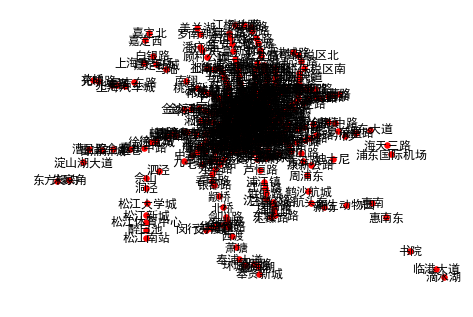

In [186]:
#所有站点展示
station_graph = nx.Graph()
station_graph.add_nodes_from(list(station_coordinates.keys()))
nx.draw(station_graph,station_coordinates, with_labels=True, node_size=30)

In [187]:
shanghai_subway.head()

,line_No,statation,longitude,latitude
393,1号线,莘庄,121.385373,31.111152
394,1号线,外环路,121.393020,31.120899
395,1号线,莲花路,121.402910,31.130900
396,1号线,锦江乐园,121.414107,31.142217
397,1号线,上海南站,121.430041,31.154579


In [188]:
shanghai_subway.line_No.unique()

array(['1号线', '2号线', '3号线', '4号线', '5号线(东川路--闵行开发区)', '5号线(莘庄--奉贤新城)',
       '6号线', '7号线', '8号线', '9号线', '10号线(航中路-新江湾城)', '10号线(虹桥火车站-新江湾城)',
       '11号线(嘉定北-迪士尼)', '11号线(花桥-迪士尼)', '12号线', '13号线', '16号线', '17号线',
       '磁悬浮', '浦江线'], dtype=object)

In [ ]:
# 处理支线
# shanghai_subway[shanghai_subway['line_No'] == '5号线(东川路--闵行开发区)'] = '5号线支线'
# subline_10 = shanghai_subway[shanghai_subway['line_No'] == '10号线(虹桥火车站-新江湾城)']['line_No']
# subline_10['line_No'] = '10号线支线'

# subline_11 = shanghai_subway[shanghai_subway['line_No'] == '11号线(嘉定北-迪士尼)']['line_No']
# subline_11['line_No'] = '11号线支线'

In [189]:
# 构建 线路--站名 的列表
line_stations = defaultdict(list)
for i in range(shanghai_subway.shape[0]):
    line, station = shanghai_subway.iloc[i].line_No,shanghai_subway.iloc[i].statation
    line_stations[line].append(station)
line_stations

defaultdict(list,
            {'1号线': ['莘庄',
              '外环路',
              '莲花路',
              '锦江乐园',
              '上海南站',
              '漕宝路',
              '上海体育馆',
              '徐家汇',
              '衡山路',
              '常熟路',
              '陕西南路',
              '黄陂南路',
              '人民广场',
              '新闸路',
              '汉中路',
              '上海火车站',
              '中山北路',
              '延长路',
              '上海马戏城',
              '汶水路',
              '彭浦新村',
              '共康路',
              '通河新村',
              '呼兰路',
              '共富新村',
              '宝安公路',
              '友谊西路',
              '富锦路'],
             '2号线': ['浦东国际机场',
              '海天三路',
              '远东大道',
              '凌空路',
              '川沙',
              '华夏东路',
              '创新中路',
              '唐镇',
              '广兰路',
              '金科路',
              '张江高科',
              '龙阳路',
              '世纪公园',
              '上海科技馆',
              '世纪大道',
              '东昌路',
              '陆家

In [190]:
# 每一个站的联通和可达关系,这里面就包含了各条线之间的换乘关系
station_connection_info = defaultdict(list) # 记录每一个站直接可达的站
station_line_map = defaultdict(list)        # 记录每一站可换乘的不同线路:用于判断一条路线上换乘次数
for line, station_list in  line_stations.items():
#     print(line,'\n',station_list)
    for i in range(len(station_list)):
        station_line_map[station_list[i]].append(line)
        if station_list[i] not in station_coordinates:
            continue
        if i > 0:
            station_connection_info[station_list[i]].append(station_list[i-1])
        if i < len(station_list) - 1:
            station_connection_info[station_list[i]].append(station_list[i+1])

In [191]:
station_connection_info

defaultdict(list,
            {'莘庄': ['外环路', '春申路'],
             '外环路': ['莘庄', '莲花路'],
             '莲花路': ['外环路', '锦江乐园'],
             '锦江乐园': ['莲花路', '上海南站'],
             '上海南站': ['锦江乐园', '漕宝路', '石龙路'],
             '漕宝路': ['上海南站', '上海体育馆', '桂林公园', '龙漕路'],
             '上海体育馆': ['漕宝路', '徐家汇', '上海体育场'],
             '徐家汇': ['上海体育馆',
              '衡山路',
              '肇嘉浜路',
              '宜山路',
              '交通大学',
              '上海游泳馆',
              '上海游泳馆',
              '交通大学'],
             '衡山路': ['徐家汇', '常熟路'],
             '常熟路': ['衡山路', '陕西南路', '肇嘉浜路', '静安寺'],
             '陕西南路': ['常熟路',
              '黄陂南路',
              '新天地',
              '上海图书馆',
              '新天地',
              '上海图书馆',
              '嘉善路',
              '南京西路'],
             '黄陂南路': ['陕西南路', '人民广场'],
             '人民广场': ['黄陂南路', '新闸路', '南京东路', '南京西路', '大世界', '曲阜路'],
             '新闸路': ['人民广场', '汉中路'],
             '汉中路': ['新闸路', '上海火车站', '南京西路', '曲阜路', '江宁路', '自然博物馆'],
             '上海火车站': 

In [192]:
station_line_map

defaultdict(list,
            {'莘庄': ['1号线', '5号线(莘庄--奉贤新城)'],
             '外环路': ['1号线'],
             '莲花路': ['1号线'],
             '锦江乐园': ['1号线'],
             '上海南站': ['1号线', '3号线'],
             '漕宝路': ['1号线', '12号线'],
             '上海体育馆': ['1号线', '4号线'],
             '徐家汇': ['1号线', '9号线', '11号线(嘉定北-迪士尼)', '11号线(花桥-迪士尼)'],
             '衡山路': ['1号线'],
             '常熟路': ['1号线', '7号线'],
             '陕西南路': ['1号线', '10号线(航中路-新江湾城)', '10号线(虹桥火车站-新江湾城)', '12号线'],
             '黄陂南路': ['1号线'],
             '人民广场': ['1号线', '2号线', '8号线'],
             '新闸路': ['1号线'],
             '汉中路': ['1号线', '12号线', '13号线'],
             '上海火车站': ['1号线', '3号线', '4号线'],
             '中山北路': ['1号线'],
             '延长路': ['1号线'],
             '上海马戏城': ['1号线'],
             '汶水路': ['1号线'],
             '彭浦新村': ['1号线'],
             '共康路': ['1号线'],
             '通河新村': ['1号线'],
             '呼兰路': ['1号线'],
             '共富新村': ['1号线'],
             '宝安公路': ['1号线'],
             '友谊西路': ['1号线'],
       

D:\ProgramData\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


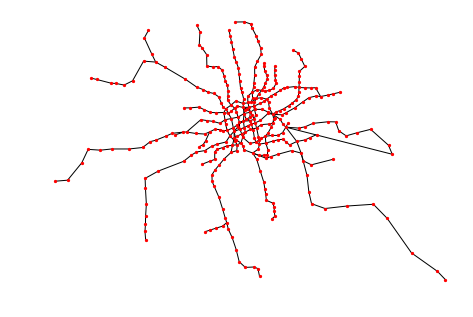

In [193]:
station_with_road = nx.Graph(station_connection_info)
nx.draw(station_with_road, station_coordinates, node_size=5)

# 3.3. Build the search agent

In [194]:
def search_bfs(graph,start,distination):
    paths = [[start]]
    
    visitied = set()
    while paths:
        path = paths.pop(0)
        froniter = path[-1]

        for city in set(graph[froniter]) - visitied:
            if city in path:
                continue
            new_path = path +[city]
            paths.append(new_path)
            
            if city == distination:
                return new_path
        visitied.add(froniter)

In [195]:
def pretty_print(cities):
    print('🚗->'.join(cities))
pretty_print(search_bfs(station_connection_info,'周浦东', '广兰路'))

周浦东🚗->罗山路🚗->华夏中路🚗->龙阳路🚗->张江高科🚗->金科路🚗->广兰路


In [196]:
pretty_print(search_bfs(station_connection_info,'周浦东', '中科路'))

周浦东🚗->罗山路🚗->华夏中路🚗->中科路


In [197]:
pretty_print(search_bfs(station_connection_info,'周浦东', '四平路'))

周浦东🚗->罗山路🚗->华夏中路🚗->龙阳路🚗->世纪公园🚗->上海科技馆🚗->世纪大道🚗->浦东大道🚗->杨树浦路🚗->大连路🚗->临平路🚗->海伦路🚗->邮电新村🚗->四平路


# 4.(Optional) Improve your agent to make it able to find a path based on different strategies

In [198]:
def get_city_distance(city1,city2,station_coordinates):
    return geo_distance(station_coordinates[city1],station_coordinates[city2])

def get_stations_of_path(path):
    '''计算一条路线上经过的站数'''
    return len(path)
        
    return distance
def get_distance_of_path(path):
    '''计算一条路线上的距离'''
    distance = 0
    for i in range(len(path) - 1):
        distance += get_city_distance(path[i], path[i+1],station_coordinates)
        
    return distance
def get_transfor_times_of_path(path):
    '''计算path上总的换乘次数
    思路： 该线路上，每一站的前一站 和后一站 可换成地铁线路列表的交集为空则当前站视为换成点'''
    transfor_number = 0
    for i in range(len(path) - 1):
        if (len(station_connection_info) <= 2)|(len(station_line_map[path[i]])<2): 
            # 如果该站可达的站小于3说明这个站 或者没有其他线路交汇，不能换成
            continue
        pre,nxt = station_line_map[path[i-1]], station_line_map[path[i+1]]
        if not set(pre)&set(nxt):
            transfor_number += 1
    
    return transfor_number
    
def sort_by_distance(paths):
    '''根据每一条路径的长度来返回'''
    return sorted(paths,key=get_distance_of_path,reverse=False)

def sort_by_transfor(paths):
    '''根据每一条路径的换乘次数来返回'''
    return sorted(paths,key=get_transfor_times_of_path,reverse=False)

def sort_by_stations(paths):
    '''根据每一条路经过的城市数的长度来返回'''
    return sorted(paths,key=get_stations_of_path, reverse=False)

def search_2(graph,start,distination,search_strategy):
    '''先求出所有可能得路径，再根据搜索策略返回响应的最优路径'''
    paths = [[start]]
    find_path = []
    
#     visitied = set()
    while paths:
        # 由于搜索时间太长 定义搜索到10条路径就返回
        if len(find_path)>10:
            break
        path = paths.pop(0)
        visitied = set(path)
        froniter = path[-1]

        for city in set(graph[froniter]) - visitied:
            new_path = path +[city]
            if city == distination:
                find_path.append(new_path)
            else:
                paths.append(new_path)
    
    find_path = search_strategy(find_path)

    if find_path and (distination == find_path[0][-1]):
        # 同时返回每一条路径的距离站数以及换乘次数
        result = [(path,get_stations_of_path(path),get_distance_of_path(path),get_transfor_times_of_path(path)) 
                  for path in find_path]
        return result

In [199]:
#测试各个搜索策略
pretty_print(search_bfs(station_connection_info,'周浦东', '中科路')) # 16号->华夏中路 换乘 13号线
get_transfor_times_of_path(search_bfs(station_connection_info,'周浦东', '中科路'))

周浦东🚗->罗山路🚗->华夏中路🚗->中科路


1

In [200]:
pretty_print(search_bfs(station_connection_info,'周浦东', '黄陂南路')) # 16号->龙阳路 换乘 2号线 ->人民广场 换乘 1号线
get_transfor_times_of_path(search_bfs(station_connection_info,'周浦东', '黄陂南路'))

周浦东🚗->罗山路🚗->华夏中路🚗->龙阳路🚗->世纪公园🚗->上海科技馆🚗->世纪大道🚗->东昌路🚗->陆家嘴🚗->南京东路🚗->人民广场🚗->黄陂南路


2

In [201]:
%%time 
path  = search_2(station_connection_info,'周浦东', '广兰路',search_strategy=sort_by_distance)
for i in range(len(path)):
    print(f"path:{i}","\n",'🚗->'.join(path[i][0]),f" with {path[i][2]}.km")
# print('🚗->'.join(path[0]),f"with {distance}.km")

path:0 
 周浦东🚗->罗山路🚗->华夏中路🚗->龙阳路🚗->张江高科🚗->金科路🚗->广兰路  with 15.028959009271556.km
path:1 
 周浦东🚗->罗山路🚗->华夏中路🚗->莲溪路🚗->陈春路🚗->北蔡🚗->下南路🚗->华鹏路🚗->东明路🚗->高科西路🚗->杨高南路🚗->锦绣路🚗->芳华路🚗->龙阳路🚗->张江高科🚗->金科路🚗->广兰路  with 26.321041602458656.km
path:2 
 周浦东🚗->罗山路🚗->华夏中路🚗->莲溪路🚗->陈春路🚗->北蔡🚗->下南路🚗->华鹏路🚗->东明路🚗->高科西路🚗->临沂新村🚗->上海儿童医学中心🚗->蓝村路🚗->浦电路(6号线)🚗->世纪大道🚗->上海科技馆🚗->世纪公园🚗->龙阳路🚗->张江高科🚗->金科路🚗->广兰路  with 28.047489385868484.km
path:3 
 周浦东🚗->罗山路🚗->华夏中路🚗->莲溪路🚗->陈春路🚗->北蔡🚗->下南路🚗->华鹏路🚗->东明路🚗->高科西路🚗->临沂新村🚗->上海儿童医学中心🚗->蓝村路🚗->浦电路(4号线)🚗->世纪大道🚗->上海科技馆🚗->世纪公园🚗->龙阳路🚗->张江高科🚗->金科路🚗->广兰路  with 28.43563143796221.km
path:4 
 周浦东🚗->罗山路🚗->华夏中路🚗->莲溪路🚗->陈春路🚗->北蔡🚗->下南路🚗->华鹏路🚗->东明路🚗->成山路🚗->耀华路🚗->云台路🚗->高科西路🚗->杨高南路🚗->锦绣路🚗->芳华路🚗->龙阳路🚗->张江高科🚗->金科路🚗->广兰路  with 29.417572190055772.km
path:5 
 周浦东🚗->罗山路🚗->御桥🚗->浦三路🚗->三林东🚗->三林🚗->东方体育中心🚗->杨思🚗->成山路🚗->耀华路🚗->云台路🚗->高科西路🚗->杨高南路🚗->锦绣路🚗->芳华路🚗->龙阳路🚗->张江高科🚗->金科路🚗->广兰路  with 32.68079774208313.km
path:6 
 周浦东🚗->罗山路🚗->御桥🚗->浦三路🚗->三林东🚗->三林🚗->东方体育中心🚗->杨思🚗->成山路🚗->东明路🚗->高科西路🚗->杨高南路🚗->锦绣路🚗->芳华路🚗->龙阳路🚗->张江高科🚗->金科路🚗->广兰路

In [202]:
%%time 
path  = search_2(station_connection_info,'周浦东', '广兰路',search_strategy=sort_by_stations)
for i in range(len(path)):
    print(f"path:{i}","\n",'🚗->'.join(path[i][0]),f" with {path[i][1]}.km")

path:0 
 周浦东🚗->罗山路🚗->华夏中路🚗->龙阳路🚗->张江高科🚗->金科路🚗->广兰路  with 7.km
path:1 
 周浦东🚗->罗山路🚗->华夏中路🚗->龙阳路🚗->浦东国际机场🚗->海天三路🚗->远东大道🚗->凌空路🚗->川沙🚗->华夏东路🚗->创新中路🚗->唐镇🚗->广兰路  with 13.km
path:2 
 周浦东🚗->罗山路🚗->华夏中路🚗->莲溪路🚗->陈春路🚗->北蔡🚗->下南路🚗->华鹏路🚗->东明路🚗->高科西路🚗->杨高南路🚗->锦绣路🚗->芳华路🚗->龙阳路🚗->张江高科🚗->金科路🚗->广兰路  with 17.km
path:3 
 周浦东🚗->罗山路🚗->御桥🚗->浦三路🚗->三林东🚗->三林🚗->东方体育中心🚗->杨思🚗->成山路🚗->东明路🚗->高科西路🚗->杨高南路🚗->锦绣路🚗->芳华路🚗->龙阳路🚗->张江高科🚗->金科路🚗->广兰路  with 18.km
path:4 
 周浦东🚗->罗山路🚗->御桥🚗->浦三路🚗->三林东🚗->三林🚗->东方体育中心🚗->杨思🚗->成山路🚗->耀华路🚗->云台路🚗->高科西路🚗->杨高南路🚗->锦绣路🚗->芳华路🚗->龙阳路🚗->张江高科🚗->金科路🚗->广兰路  with 19.km
path:5 
 周浦东🚗->罗山路🚗->御桥🚗->浦三路🚗->三林东🚗->三林🚗->东方体育中心🚗->灵岩南路🚗->上南路🚗->华夏西路🚗->高青路🚗->东明路🚗->高科西路🚗->杨高南路🚗->锦绣路🚗->芳华路🚗->龙阳路🚗->张江高科🚗->金科路🚗->广兰路  with 20.km
path:6 
 周浦东🚗->罗山路🚗->御桥🚗->浦三路🚗->三林东🚗->三林🚗->东方体育中心🚗->杨思🚗->成山路🚗->长清路🚗->耀华路🚗->云台路🚗->高科西路🚗->杨高南路🚗->锦绣路🚗->芳华路🚗->龙阳路🚗->张江高科🚗->金科路🚗->广兰路  with 20.km
path:7 
 周浦东🚗->罗山路🚗->御桥🚗->浦三路🚗->三林东🚗->三林🚗->东方体育中心🚗->杨思🚗->成山路🚗->东明路🚗->华鹏路🚗->下南路🚗->北蔡🚗->陈春路🚗->莲溪路🚗->华夏中路🚗->龙阳路🚗->张江高科🚗->金科路🚗->广兰路  with 20.km
path:8 
 周浦东🚗->罗山路

In [203]:
# search_2(station_connection_info,'周浦东', '广兰路',search_strategy=sort_by_distance)
search_bfs(station_connection_info,'周浦东', '蓝村路')

['周浦东', '罗山路', '华夏中路', '龙阳路', '世纪公园', '上海科技馆', '世纪大道', '浦电路(6号线)', '蓝村路']

In [204]:
path  = search_2(station_connection_info,'人民广场', '蓝村路',search_strategy=sort_by_transfor)
for i in range(len(path)):
    print(f"path:{i}","\n",'🚗->'.join(path[i][0]))

path:0 
 人民广场🚗->南京东路🚗->陆家嘴🚗->东昌路🚗->世纪大道🚗->浦电路(6号线)🚗->蓝村路
path:1 
 人民广场🚗->南京东路🚗->陆家嘴🚗->东昌路🚗->世纪大道🚗->浦电路(4号线)🚗->蓝村路
path:2 
 人民广场🚗->大世界🚗->老西门🚗->陆家浜路🚗->西藏南路🚗->南浦大桥🚗->塘桥🚗->蓝村路
path:3 
 人民广场🚗->南京西路🚗->陕西南路🚗->嘉善路🚗->大木桥路🚗->鲁班路🚗->西藏南路🚗->南浦大桥🚗->塘桥🚗->蓝村路
path:4 
 人民广场🚗->大世界🚗->老西门🚗->陆家浜路🚗->小南门🚗->商城路🚗->世纪大道🚗->浦电路(6号线)🚗->蓝村路
path:5 
 人民广场🚗->大世界🚗->老西门🚗->陆家浜路🚗->小南门🚗->商城路🚗->世纪大道🚗->浦电路(4号线)🚗->蓝村路
path:6 
 人民广场🚗->南京西路🚗->陕西南路🚗->新天地🚗->老西门🚗->陆家浜路🚗->西藏南路🚗->南浦大桥🚗->塘桥🚗->蓝村路
path:7 
 人民广场🚗->南京东路🚗->豫园🚗->老西门🚗->陆家浜路🚗->西藏南路🚗->南浦大桥🚗->塘桥🚗->蓝村路
path:8 
 人民广场🚗->曲阜路🚗->天潼路🚗->南京东路🚗->陆家嘴🚗->东昌路🚗->世纪大道🚗->浦电路(6号线)🚗->蓝村路
path:9 
 人民广场🚗->曲阜路🚗->天潼路🚗->南京东路🚗->陆家嘴🚗->东昌路🚗->世纪大道🚗->浦电路(4号线)🚗->蓝村路
path:10 
 人民广场🚗->南京西路🚗->陕西南路🚗->新天地🚗->马当路🚗->陆家浜路🚗->西藏南路🚗->南浦大桥🚗->塘桥🚗->蓝村路


In [205]:
path  = search_2(station_connection_info,'周浦东', '蓝村路',search_strategy=sort_by_transfor)
for i in range(len(path)):
    print(f"path:{i}","\n",'🚗->'.join(path[i][0]),f" with transform {path[i][3]}.line")

path:0 
 周浦东🚗->罗山路🚗->华夏中路🚗->龙阳路🚗->世纪公园🚗->上海科技馆🚗->世纪大道🚗->浦电路(6号线)🚗->蓝村路  with transform 2.line
path:1 
 周浦东🚗->罗山路🚗->华夏中路🚗->龙阳路🚗->世纪公园🚗->上海科技馆🚗->世纪大道🚗->浦电路(4号线)🚗->蓝村路  with transform 2.line
path:2 
 周浦东🚗->罗山路🚗->华夏中路🚗->龙阳路🚗->芳华路🚗->锦绣路🚗->杨高南路🚗->高科西路🚗->临沂新村🚗->上海儿童医学中心🚗->蓝村路  with transform 2.line
path:3 
 周浦东🚗->罗山路🚗->华夏中路🚗->莲溪路🚗->陈春路🚗->北蔡🚗->下南路🚗->华鹏路🚗->东明路🚗->高科西路🚗->临沂新村🚗->上海儿童医学中心🚗->蓝村路  with transform 2.line
path:4 
 周浦东🚗->罗山路🚗->御桥🚗->浦三路🚗->三林东🚗->三林🚗->东方体育中心🚗->灵岩南路🚗->上南路🚗->华夏西路🚗->高青路🚗->东明路🚗->高科西路🚗->临沂新村🚗->上海儿童医学中心🚗->蓝村路  with transform 2.line
path:5 
 周浦东🚗->罗山路🚗->御桥🚗->浦三路🚗->三林东🚗->三林🚗->东方体育中心🚗->杨思🚗->成山路🚗->耀华路🚗->中华艺术宫🚗->西藏南路🚗->南浦大桥🚗->塘桥🚗->蓝村路  with transform 3.line
path:6 
 周浦东🚗->罗山路🚗->华夏中路🚗->龙阳路🚗->芳华路🚗->锦绣路🚗->杨高南路🚗->高科西路🚗->云台路🚗->耀华路🚗->中华艺术宫🚗->西藏南路🚗->南浦大桥🚗->塘桥🚗->蓝村路  with transform 3.line
path:7 
 周浦东🚗->罗山路🚗->御桥🚗->浦三路🚗->三林东🚗->三林🚗->东方体育中心🚗->杨思🚗->成山路🚗->东明路🚗->高科西路🚗->临沂新村🚗->上海儿童医学中心🚗->蓝村路  with transform 4.line
path:8 
 周浦东🚗->罗山路🚗->华夏中路🚗->龙阳路🚗->世纪公园🚗->上海科技馆🚗->世纪大道🚗->商城路🚗->小南门🚗->陆家浜路🚗->西藏南路🚗->南浦大桥

In [206]:
path  = search_2(station_connection_info,'周浦东', '黄陂南路',search_strategy=sort_by_transfor)
for i in range(len(path)-5):
    print(f"path:{i}","\n",'🚗->'.join(path[i][0]),f" with transform {path[i][3]}.line")

path:0 
 周浦东🚗->罗山路🚗->华夏中路🚗->龙阳路🚗->世纪公园🚗->上海科技馆🚗->世纪大道🚗->东昌路🚗->陆家嘴🚗->南京东路🚗->人民广场🚗->黄陂南路  with transform 2.line
path:1 
 周浦东🚗->罗山路🚗->华夏中路🚗->龙阳路🚗->世纪公园🚗->上海科技馆🚗->世纪大道🚗->东昌路🚗->陆家嘴🚗->南京东路🚗->人民广场🚗->南京西路🚗->陕西南路🚗->黄陂南路  with transform 2.line
path:2 
 周浦东🚗->罗山路🚗->御桥🚗->浦三路🚗->三林东🚗->三林🚗->东方体育中心🚗->龙耀路🚗->云锦路🚗->龙华🚗->龙华中路🚗->大木桥路🚗->嘉善路🚗->陕西南路🚗->黄陂南路  with transform 3.line
path:3 
 周浦东🚗->罗山路🚗->华夏中路🚗->龙阳路🚗->世纪公园🚗->上海科技馆🚗->世纪大道🚗->东昌路🚗->陆家嘴🚗->南京东路🚗->豫园🚗->老西门🚗->新天地🚗->陕西南路🚗->黄陂南路  with transform 3.line
path:4 
 周浦东🚗->罗山路🚗->华夏中路🚗->龙阳路🚗->世纪公园🚗->上海科技馆🚗->世纪大道🚗->商城路🚗->小南门🚗->陆家浜路🚗->老西门🚗->大世界🚗->人民广场🚗->黄陂南路  with transform 4.line
path:5 
 周浦东🚗->罗山路🚗->华夏中路🚗->龙阳路🚗->世纪公园🚗->上海科技馆🚗->世纪大道🚗->东昌路🚗->陆家嘴🚗->南京东路🚗->豫园🚗->老西门🚗->大世界🚗->人民广场🚗->黄陂南路  with transform 4.line


In [207]:
path  = search_2(station_connection_info,'周浦东', '上海大学',search_strategy=sort_by_transfor)
for i in range(len(path)-5):
    print(f"path:{i}","\n",'🚗->'.join(path[i][0]),f" with transform {path[i][3]}.line")

path:0 
 周浦东🚗->罗山路🚗->华夏中路🚗->龙阳路🚗->世纪公园🚗->上海科技馆🚗->世纪大道🚗->东昌路🚗->陆家嘴🚗->南京东路🚗->人民广场🚗->南京西路🚗->汉中路🚗->江宁路🚗->长寿路🚗->镇坪路🚗->岚皋路🚗->新村路🚗->大华三路🚗->行知路🚗->大场镇🚗->场中路🚗->上大路🚗->南陈路🚗->上海大学  with transform 2.line
path:1 
 周浦东🚗->罗山路🚗->华夏中路🚗->龙阳路🚗->世纪公园🚗->上海科技馆🚗->世纪大道🚗->东昌路🚗->陆家嘴🚗->南京东路🚗->人民广场🚗->南京西路🚗->静安寺🚗->昌平路🚗->长寿路🚗->镇坪路🚗->岚皋路🚗->新村路🚗->大华三路🚗->行知路🚗->大场镇🚗->场中路🚗->上大路🚗->南陈路🚗->上海大学  with transform 2.line
path:2 
 周浦东🚗->罗山路🚗->华夏中路🚗->龙阳路🚗->世纪公园🚗->上海科技馆🚗->世纪大道🚗->浦东大道🚗->杨树浦路🚗->大连路🚗->临平路🚗->海伦路🚗->宝山路🚗->上海火车站🚗->中潭路🚗->镇坪路🚗->岚皋路🚗->新村路🚗->大华三路🚗->行知路🚗->大场镇🚗->场中路🚗->上大路🚗->南陈路🚗->上海大学  with transform 3.line
path:3 
 周浦东🚗->罗山路🚗->御桥🚗->浦三路🚗->三林东🚗->三林🚗->东方体育中心🚗->龙耀路🚗->云锦路🚗->龙华🚗->上海游泳馆🚗->徐家汇🚗->交通大学🚗->江苏路🚗->隆德路🚗->曹杨路🚗->镇坪路🚗->岚皋路🚗->新村路🚗->大华三路🚗->行知路🚗->大场镇🚗->场中路🚗->上大路🚗->南陈路🚗->上海大学  with transform 3.line
path:4 
 周浦东🚗->罗山路🚗->华夏中路🚗->龙阳路🚗->世纪公园🚗->上海科技馆🚗->世纪大道🚗->东昌路🚗->陆家嘴🚗->南京东路🚗->人民广场🚗->南京西路🚗->汉中路🚗->上海火车站🚗->中潭路🚗->镇坪路🚗->岚皋路🚗->新村路🚗->大华三路🚗->行知路🚗->大场镇🚗->场中路🚗->上大路🚗->南陈路🚗->上海大学  with transform 4.line
path:5 
 周浦东🚗->罗山路🚗->华夏中路🚗->龙阳路🚗->世纪公园🚗->上海科技馆

# 这里不对，应该是 16号  龙阳路 换乘 -> 7号 才对！！原因没有查到

In [208]:
%%time
path  = search_2(station_connection_info,'周浦东', '上海大学',search_strategy=sort_by_stations)
for i in range(len(path)-5):
    print(f"path:{i}","\n",'🚗->'.join(path[i][0]),f" with transform {path[i][3]}.line")

path:0 
 周浦东🚗->罗山路🚗->华夏中路🚗->龙阳路🚗->世纪公园🚗->上海科技馆🚗->世纪大道🚗->东昌路🚗->陆家嘴🚗->南京东路🚗->天潼路🚗->曲阜路🚗->汉中路🚗->上海火车站🚗->中潭路🚗->镇坪路🚗->岚皋路🚗->新村路🚗->大华三路🚗->行知路🚗->大场镇🚗->场中路🚗->上大路🚗->南陈路🚗->上海大学  with transform 6.line
path:1 
 周浦东🚗->罗山路🚗->华夏中路🚗->龙阳路🚗->世纪公园🚗->上海科技馆🚗->世纪大道🚗->东昌路🚗->陆家嘴🚗->南京东路🚗->天潼路🚗->曲阜路🚗->汉中路🚗->江宁路🚗->长寿路🚗->镇坪路🚗->岚皋路🚗->新村路🚗->大华三路🚗->行知路🚗->大场镇🚗->场中路🚗->上大路🚗->南陈路🚗->上海大学  with transform 5.line
path:2 
 周浦东🚗->罗山路🚗->华夏中路🚗->龙阳路🚗->世纪公园🚗->上海科技馆🚗->世纪大道🚗->东昌路🚗->陆家嘴🚗->南京东路🚗->人民广场🚗->南京西路🚗->汉中路🚗->上海火车站🚗->中潭路🚗->镇坪路🚗->岚皋路🚗->新村路🚗->大华三路🚗->行知路🚗->大场镇🚗->场中路🚗->上大路🚗->南陈路🚗->上海大学  with transform 4.line
path:3 
 周浦东🚗->罗山路🚗->华夏中路🚗->龙阳路🚗->世纪公园🚗->上海科技馆🚗->世纪大道🚗->东昌路🚗->陆家嘴🚗->南京东路🚗->人民广场🚗->南京西路🚗->汉中路🚗->江宁路🚗->长寿路🚗->镇坪路🚗->岚皋路🚗->新村路🚗->大华三路🚗->行知路🚗->大场镇🚗->场中路🚗->上大路🚗->南陈路🚗->上海大学  with transform 2.line
path:4 
 周浦东🚗->罗山路🚗->华夏中路🚗->龙阳路🚗->世纪公园🚗->上海科技馆🚗->世纪大道🚗->东昌路🚗->陆家嘴🚗->南京东路🚗->人民广场🚗->南京西路🚗->静安寺🚗->昌平路🚗->长寿路🚗->镇坪路🚗->岚皋路🚗->新村路🚗->大华三路🚗->行知路🚗->大场镇🚗->场中路🚗->上大路🚗->南陈路🚗->上海大学  with transform 2.line
path:5 
 周浦东🚗->罗山路🚗->华夏中路🚗->龙阳路🚗->世纪公园🚗->上海科技馆🚗->世

这个经历的站数和下面的2个自带算法是一样的，但是路线啊不同

In [209]:
%%time 
# 使用 dijkstra
path=nx.dijkstra_path(station_with_road, source='周浦东', target='上海大学')
print("transform times: ",get_transfor_times_of_path(path),"stations: ",get_stations_of_path(path),'\t','🚗->'.join(path))

transform times:  4 stations:  25 	 周浦东🚗->罗山路🚗->华夏中路🚗->龙阳路🚗->世纪公园🚗->上海科技馆🚗->世纪大道🚗->东昌路🚗->陆家嘴🚗->南京东路🚗->人民广场🚗->新闸路🚗->汉中路🚗->上海火车站🚗->中潭路🚗->镇坪路🚗->岚皋路🚗->新村路🚗->大华三路🚗->行知路🚗->大场镇🚗->场中路🚗->上大路🚗->南陈路🚗->上海大学
Wall time: 1.99 ms


In [210]:
# 使用 networkx 自带的 shortest_path 16 ->2 -> 1 -> 3 -> 7
path=nx.shortest_path(station_with_road, source='周浦东', target='上海大学',weight="weight")
print("transform times: ",get_transfor_times_of_path(path),"stations: ",get_stations_of_path(path),'\t','🚗->'.join(path))

transform times:  4 stations:  25 	 周浦东🚗->罗山路🚗->华夏中路🚗->龙阳路🚗->世纪公园🚗->上海科技馆🚗->世纪大道🚗->东昌路🚗->陆家嘴🚗->南京东路🚗->人民广场🚗->新闸路🚗->汉中路🚗->上海火车站🚗->中潭路🚗->镇坪路🚗->岚皋路🚗->新村路🚗->大华三路🚗->行知路🚗->大场镇🚗->场中路🚗->上大路🚗->南陈路🚗->上海大学


In [211]:
print(nx.shortest_path_length(station_with_road, source='周浦东', target='上海大学',weight="weight"))

24


search_2 如果不限定搜索到前N条路径就返回的话，运行时间无法忍受!!!